# Exploratory Descriptive Analysis: New York City Airbnb Open Data

**Objective:**

>In this project I will carry out **exploratory descriptive analysis** of the data in order to understand the dataset and form an **hypothesis** that can be useful for **future decision making**. This has been created in a simple and well-detailed structure that can be followed to carry out comprehensive analysis on data involved in any future study.



>This dataset includes all needed information to discover more about hosts, geographical availability, necessary metrics to draw conclusions.


**Inspiration:**

1.What can we learn about different hosts and areas?

2.What can we learn from predictions? (ex: locations, prices, reviews, etc)

3.Which hosts are the busiest and why?

4.Is there any noticeable difference of traffic among different areas and what could be the reason for it?



<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#1.-Import-libraries" data-toc-modified-id="1.-Import-libraries--1.1">1. Import libraries</a></span></li><li><span><a href="#2.-Load-data-into-a-dataframe" data-toc-modified-id="2.-Load-data-into-a-dataframe--1.2">2. Load data into a dataframe</a></span></li><li><span><a href="#3.-Descriptive-Statistics" data-toc-modified-id="3.-Descriptive-Statistics--1.3">3. Descriptive Statistics</a></span></li><li><span><a href="#4.-Value-counts-in-categorical-columns" data-toc-modified-id="4.-Value-counts-in-categorical-columns--1.4">4. Value counts in categorical columns</a></span></li><li><span><a href="#5.-Visualise-categorical-columns" data-toc-modified-id="5.-Visualise-categorical-columns--1.5">5. Visualise categorical columns</a></span></li></ul></li><li><span><a href="#Exploratory-Analysis" data-toc-modified-id="Exploratory-Analysis-0">Exploratory Analysis</a></span><ul class="toc-item"><li><span><a href="#A.-Geographic-Analysis" data-toc-modified-id="A.-Geographic-Analysis-0.1">A. Geographic Analysis</a></span></li><li><span><a href="#B.-Average-Price-Per-Room-Type" data-toc-modified-id="B.-Average-Price-Per-Room-Type-0.2">B. Average Price Per Room Type</a></span></li><li><span><a href="#C.-Average-Price-Per-Neighbourhood-Group" data-toc-modified-id="C.-Average-Price-Per-Neighbourhood-Group-0.3">C. Average Price Per Neighbourhood Group</a></span></li><li><span><a href="#D.-Hosts-with-the-most-listings-on-Airbnb" data-toc-modified-id="D.-Hosts-with-the-most-listings-on-Airbnb-0.4">D. Hosts with the most listings on Airbnb</a></span></li><li><span><a href="#E.-Top-Reviewed-Hosts" data-toc-modified-id="E.-Top-Reviewed-Hosts-0.5">E. Top Reviewed Hosts</a></span></li><li><span><a href="#Findings/Summary" data-toc-modified-id="Findings/Summary-0.6">Findings/Summary</a></span></li></ul></li></ul></div>

### 1. Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats
import seaborn as sns
sns.set(color_codes=True)
import warnings
warnings.filterwarnings('ignore')

### 2. Load data into a dataframe

In [2]:
import os
working_directory = os.getcwd()
print(working_directory)

/Users/itunuolaitan/Documents/2022/datasets


In [3]:
path = working_directory + '/AB_NYC_2019_Clean.csv'
data = pd.read_csv(path)
data.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19 00:00:00,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21 00:00:00,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,No Reviews,No Reviews,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05 00:00:00,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19 00:00:00,0.1,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22 00:00:00,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05 00:00:00,0.4,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24 00:00:00,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21 00:00:00,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09 00:00:00,1.33,4,188


Check many columns and rows the dataset holds

In [4]:
data.shape

(48847, 16)

In [5]:
#Double check datatypes in the new dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48847 entries, 0 to 48846
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48847 non-null  int64  
 1   name                            48847 non-null  object 
 2   host_id                         48847 non-null  int64  
 3   host_name                       48847 non-null  object 
 4   neighbourhood_group             48847 non-null  object 
 5   neighbourhood                   48847 non-null  object 
 6   latitude                        48847 non-null  float64
 7   longitude                       48847 non-null  float64
 8   room_type                       48847 non-null  object 
 9   price                           48847 non-null  int64  
 10  minimum_nights                  48847 non-null  int64  
 11  number_of_reviews               48847 non-null  int64  
 12  last_review                     

In [6]:
data.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

There are no null values in the cleaned dataset

### 3. Descriptive Statistics

In [7]:
data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,4.884700e+04,4.884700e+04,48847.000000,48847.000000,48847.000000,48847.000000,48847.000000,48847.000000,48847.000000
mean,1.902300e+07,6.763372e+07,40.728945,-73.952176,152.774705,7.012365,23.270621,7.149016,112.799599
std,1.098410e+07,7.862959e+07,0.054529,0.046161,240.248498,20.021362,44.550647,32.968270,131.615947
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,10.000000,1.000000,0.000000,1.000000,0.000000
25%,9.475094e+06,7.814734e+06,40.690090,-73.983080,69.000000,1.000000,1.000000,1.000000,0.000000
50%,1.968202e+07,3.079133e+07,40.723080,-73.955690,106.000000,3.000000,5.000000,1.000000,45.000000
75%,2.915833e+07,1.074344e+08,40.763110,-73.936295,175.000000,5.000000,24.000000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,327.000000,365.000000


 The summary table above provides the following observations: 
 
 - The average price for booking an Airbnb is £152.77
 - The quartile figures suggests that at least 50% of listings were advertised for were for 3 nights minimum

### 4. Value counts in categorical columns

This looks at the value counts for the catergorical columns: 
`neighbourhood_group`, `neighbourhood` and `room_type` 

In [8]:
data['neighbourhood_group'].value_counts()

Manhattan        21642
Brooklyn         20080
Queens            5664
Bronx             1088
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [9]:
data['neighbourhood'].value_counts()

Williamsburg          3916
Bedford-Stuyvesant    3709
Harlem                2655
Bushwick              2459
Upper West Side       1969
                      ... 
Richmondtown             1
New Dorp                 1
Rossville                1
Willowbrook              1
Fort Wadsworth           1
Name: neighbourhood, Length: 221, dtype: int64

In [10]:
data['room_type'].value_counts()

Entire home/apt    25391
Private room       22299
Shared room         1157
Name: room_type, dtype: int64

### 5. Visualise categorical columns

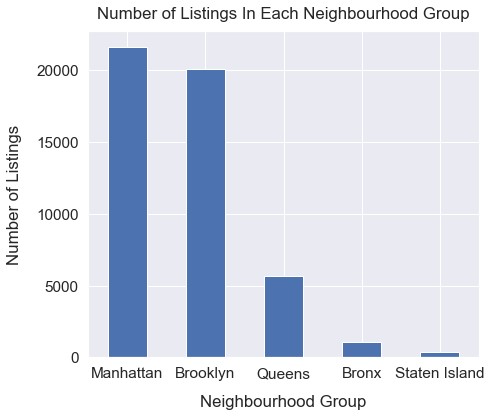

In [11]:
sns.set(font_scale=1.4)
data['neighbourhood_group'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Neighbourhood Group", labelpad=14)
plt.ylabel("Number of Listings", labelpad=14)
plt.title("Number of Listings In Each Neighbourhood Group", y=1.02);

Text(0.5, 1.0, 'Number of Listings In Each Neighbourhood Group')

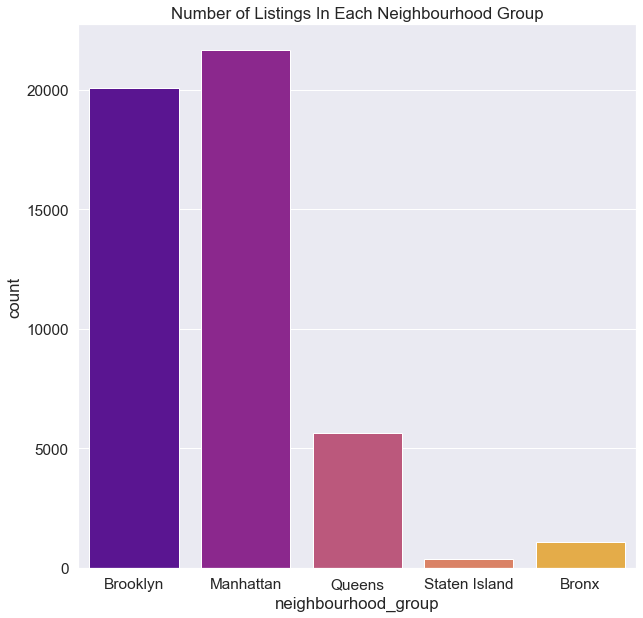

In [12]:
sns.countplot(data['neighbourhood_group'], palette="plasma")
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Number of Listings In Each Neighbourhood Group')

The plot shows that Manhatten and Brooklyn have the highest number of listings on Airbnb whereas Bronx and Staten Island has the lowest

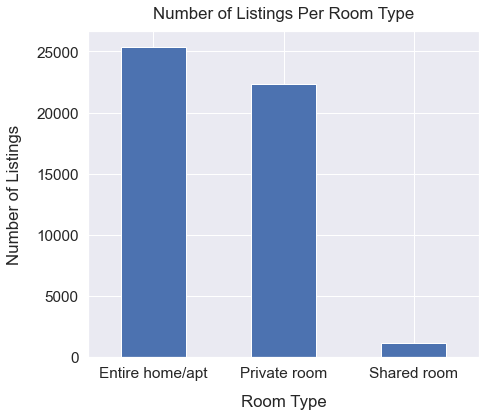

In [13]:
sns.set(font_scale=1.4)
data['room_type'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Room Type", labelpad=14)
plt.ylabel("Number of Listings", labelpad=14)
plt.title("Number of Listings Per Room Type", y=1.02);

Text(0.5, 1.0, 'Number of Listings Per Room Type')

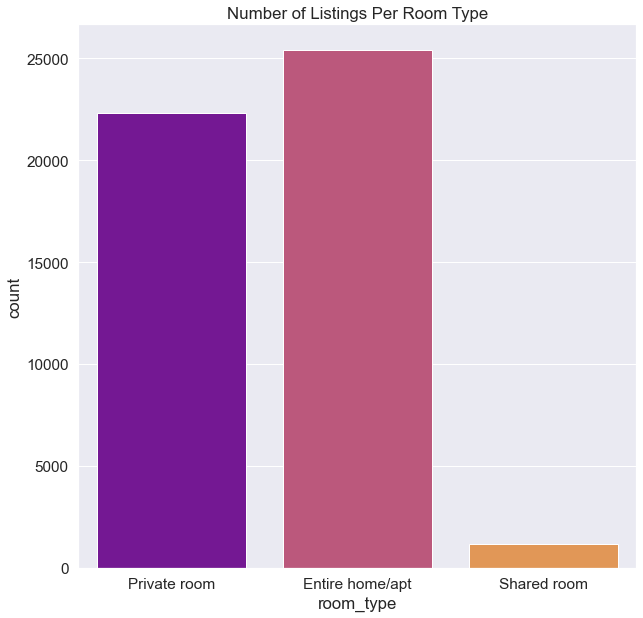

In [14]:
sns.countplot(data['room_type'], palette="plasma")
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Number of Listings Per Room Type')

The plot above the Entire home and apartments as well as Private rooms are the popular types of the rooms listed on Airbnb in New York City. It can be said that the Shared room types are not a popular type of listing

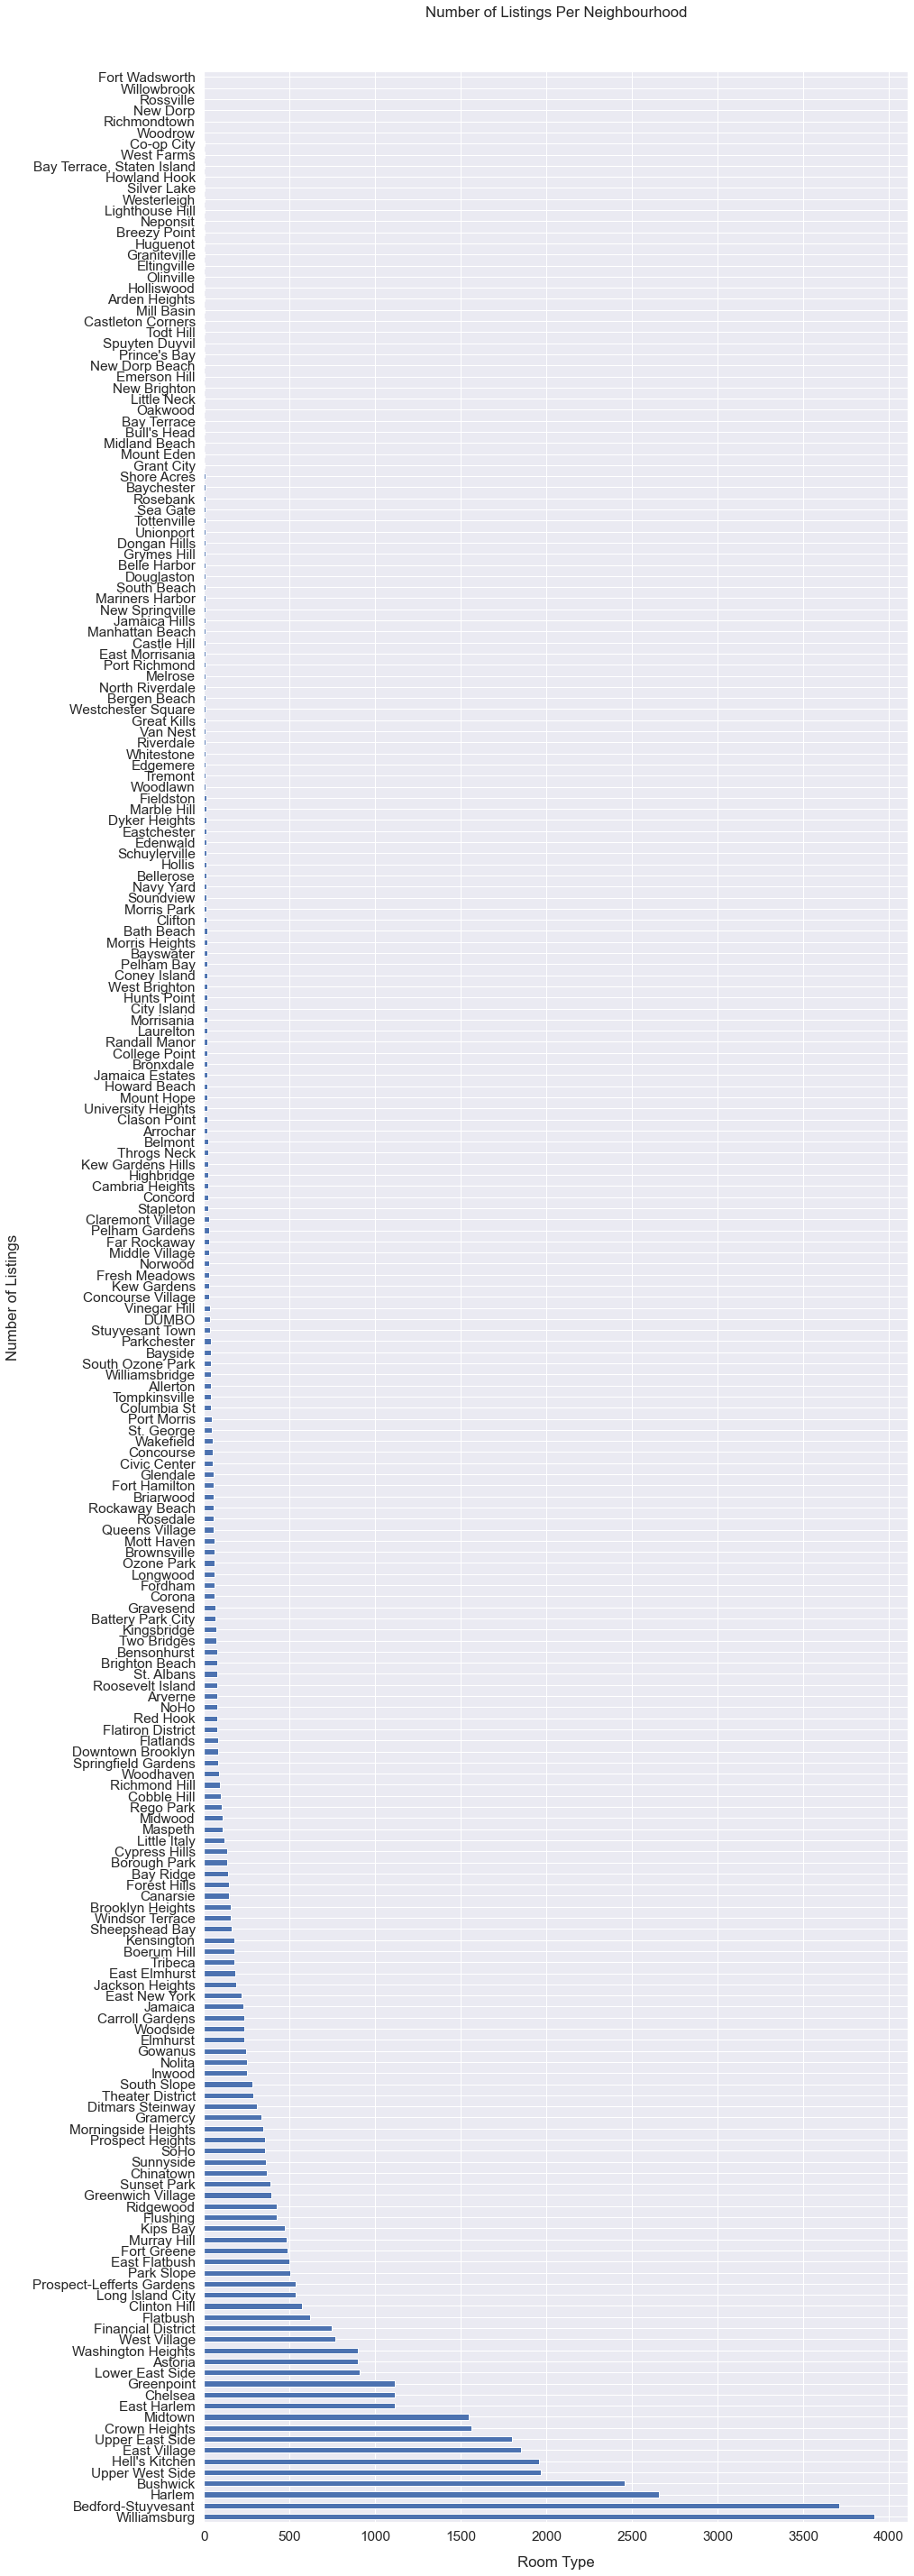

In [15]:
sns.set(font_scale=1.4)
data['neighbourhood'].value_counts().plot(kind='barh', figsize=(14, 50), rot=0)
plt.xlabel("Room Type", labelpad=14)
plt.ylabel("Number of Listings", labelpad=14)
plt.title("Number of Listings Per Neighbourhood", y=1.02);

The horizontal bar chart above shows that the majority of the listings are in the Williamsburg, Bedfrod-Stuyvesant, Bushwick and Upper West Side neighbourhoods.


From the above, of the 221 neighbourhoods, the 10 most frequent neighbourhood:

 - Williamsburg
 - Bedford-Stuyvesant
 - Harlem
 - Bushwick
 - Upper West Side
 - Hell's Kitchen
 - East Village
 - Upper East Side
 - Crown Heights
 - Midtown

>From the value counts and the bar charts created above, it can be concluded that the three most frequent categories of the categorical variables `room_type`, `neighborhood` and `neighborhood_group` are:


**room_type:**
1. Entire home/apt - 25391
2. Private room - 22299
3. Shared room  - 1157



**neighbourhood:**
1. Williamsburg  - 3916
2. Bedford-Stuyvesant - 3709
3. Harlem  - 2655


**neighbourhood_group:**
1. Manhattan - 21642
2. Brooklyn  - 20080
3. Queens - 5664

## Exploratory Analysis

**Inspiration:**

1.What can we learn about different hosts and areas?

2.What can we learn from predictions? (ex: locations, prices, reviews, etc)

3.Which hosts are the busiest and why?


### A. Geographic Analysis

In this analysis, I will explore the behaviour of prices, room_type availabilities through the geospatial data available in the dataset. The longitude and latitude points were used for visualisation.

 - **Map of area where Airbnb where listings are covered**

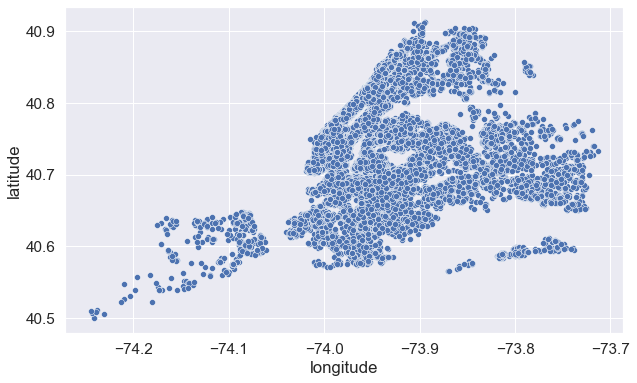

In [16]:
plt.figure(figsize=(10,6))
sns.scatterplot(data.longitude,data.latitude)
plt.ioff()

 - **Map of neighbourhood where Airbnb where listings are covered**

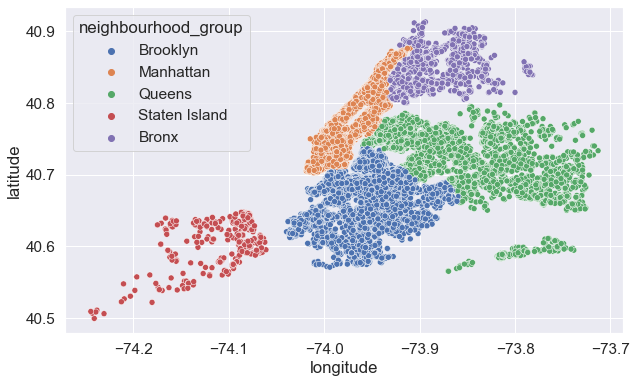

In [17]:
plt.figure(figsize=(10,6))
sns.scatterplot(data.longitude,data.latitude,hue=data.neighbourhood_group)
plt.ioff()

 - **Map showing room type availability**

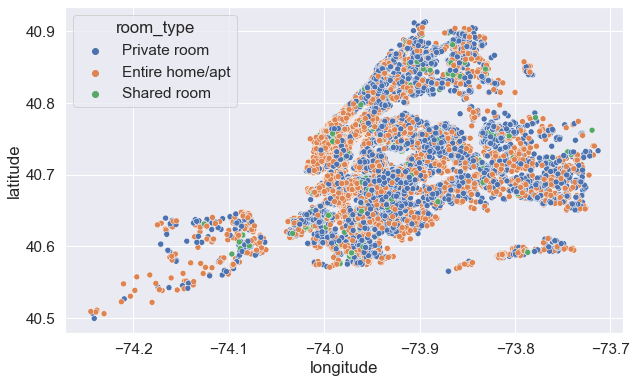

In [18]:
plt.figure(figsize=(10,6))
sns.scatterplot(data.longitude,data.latitude,hue=data.room_type)
plt.ioff()

 - **Price preference on listings**

In [19]:
def price_range(val):
    if val <= 100:
        return 'Below 100 dollars'
    elif val <= 200 and val > 100:
        return 'Between 101- 200 dollars'
    elif val <= 400 and val > 200:
        return 'Between 201-400 dollars'
    elif val <= 500 and val > 400:
        return 'Between 401-500 dollars'
    elif val <= 1000 and val > 500:
        return 'Between 501-1000 dollars'
    elif val <= 2500 and val > 1000:
        return 'Between 1001-2500 dollars'
    elif val <= 5000 and val > 2500:
        return 'Between 2501-5000 dollars'
    elif val <= 10000 and val > 5000:
        return 'Between 5001-10000 dollars'

In [20]:
data['price_range'] = data['price'].apply(price_range)
print('Unique values in column:', np.unique(data['price_range']))

Unique values in column: ['Below 100 dollars' 'Between 1001-2500 dollars'
 'Between 101- 200 dollars' 'Between 201-400 dollars'
 'Between 2501-5000 dollars' 'Between 401-500 dollars'
 'Between 5001-10000 dollars' 'Between 501-1000 dollars']


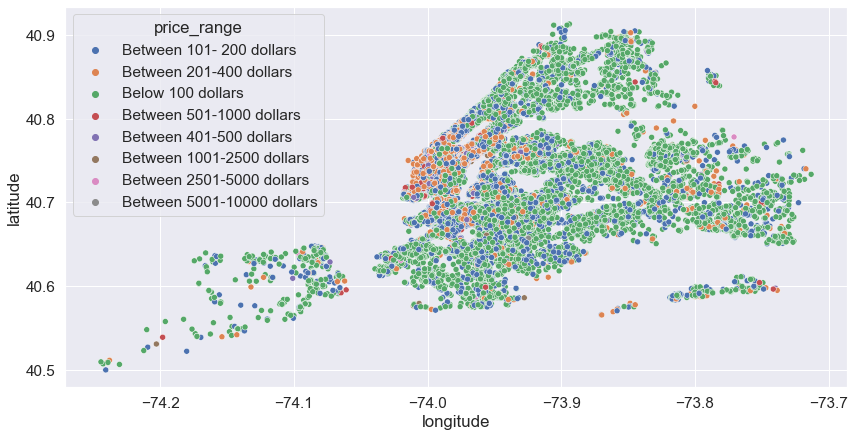

In [21]:
plt.figure(figsize=(14,7))
sns.scatterplot(data.longitude,data.latitude,hue=data.price_range)
plt.ioff()

From the above graph, we can see that majority of bookings made were priced below 100 dollars.

### B. Average Price Per Room Type

In [22]:
data.groupby('room_type').agg('mean')['price']

room_type
Entire home/apt    211.823678
Private room        89.822548
Shared room         70.197061
Name: price, dtype: float64

Grouping the room types by mean shows that the average reservation price for the Entire home/apt is 211.82 dollars. We can see that the Entire home/apt is on average 122 dollar more expensive than the Private room and 141 dollars more expensive than the Shared room. It is worth noting here that the average price for reservations for the Entire home /apt represents 51.98% of all room types.

The average booking price of a Private room is 89.82 dollars, which represents 24.15% of all types of rooms .

Lastly, Shared room which has an average booking price of around 70.2 dollars , which represents 18.86% of all types of rooms.

**Distributions on average reservation prices**

It would be interesting to see how the average prices are distributed, and for this histograms will be used

array([[<AxesSubplot:title={'center':'price'}>]], dtype=object)

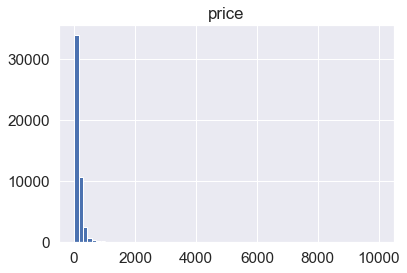

In [23]:
data.hist(column='price', bins=70)

array([[<AxesSubplot:title={'center':'price'}>]], dtype=object)

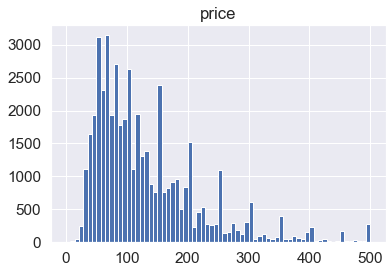

In [28]:
data.hist(column='price', bins=70, range=(0,500))

For the histogram showing distribution of prices below 1000 dollars, we can see that the price data is positively skewed where a large proportion of listings have low reservation prices (between 0 and 200 dollars). This means that if we were to train a model on this data, it will perform better at predicting the price of listings in New York with lower prices compared to listings with higher prices.
The prices being positively skewed also indicated most of the outliers are present on the right side of the distribution.

### C. Average Price Per Neighbourhood Group

In [25]:
data.groupby('neighbourhood_group').agg('mean')['price']

neighbourhood_group
Bronx             87.549632
Brooklyn         124.466285
Manhattan        196.906571
Queens            99.536017
Staten Island    114.812332
Name: price, dtype: float64

We can see that the average reservation price for the Manhattan neighbourhood group is 196.91 dollars which is the most expensive neighbourhood group in the dataset. The Bronx neighbourhood group has the lowest average reservation price at 87.55 dollars. 

### D. Hosts with the most listings on Airbnb

In [29]:
#create a df for top hosts
top_hosts = data['host_id'].value_counts().head(10)
top_hosts

219517861    327
107434423    232
30283594     121
137358866    103
12243051      96
16098958      96
61391963      91
22541573      87
200380610     65
7503643       52
Name: host_id, dtype: int64

In [30]:
#create a dataframe for visualisation
hosts_df=pd.DataFrame(top_hosts)
hosts_df

,host_id
219517861,327
107434423,232
30283594,121
137358866,103
12243051,96
16098958,96
61391963,91
22541573,87
200380610,65
7503643,52


<AxesSubplot:xlabel='count', ylabel='host_id'>

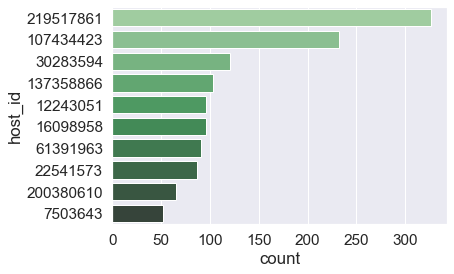

In [38]:
sns.countplot(y="host_id", data=data, palette="Greens_d",
              order=data.host_id.value_counts().iloc[:10].index)

The seaborn plot above shows the top 10 hosts with the most listings - can see host '219517861' has the highest which is 327 listings on Airbnb.

### Conclusion

In conclusion, the exploratory data analysis on the Airbnb dataset highlighted the following: 

* The average price for a booking is £152.77
* 50% of listings are for guests to book a stay for 3 nights minimum
* Looking at the count of listings in the various neigbourhood and room types, we saw that the Manhattan and Brooklyn neighbourhoods have the highest number of listings on Airbnb with entire home/apartment being the most popular room type.
* We looked at the top 10 hosts with the most listings and found the top host has 327 listings on Airbnb 
* Comparing the price of listings in the different neigbhourhoods - the average reservation price in the Bronx neighbourhood is 87.55 dollars whereas the average price per night in Manhattan is 196.91 dollars


To further the data exploration at this stage it will be helpful to have data on the listing and host ratings i.e. positive or negative reviews, feedback from guests where sentiment analysis can be used to identify a positive or negative review.